# Problem statement

**Customer Churn Prediction:

  A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers     likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics       along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.


# Loadnig the Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()
os.chdir("F:\Read_data")

In [3]:
data =pd.read_csv("churn_prediction.csv")

In [4]:
data.shape

(28382, 21)

In [5]:
data.drop_duplicates().shape        # no duplicates

(28382, 21)

In [6]:
cols=data.columns
cols

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [7]:
data.head(30)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [8]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [9]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [10]:
data[["gender","dependents","occupation","city","days_since_last_transaction"]].head()

,gender,dependents,occupation,city,days_since_last_transaction
0,Male,0.0,self_employed,187.0,224.0
1,Male,0.0,self_employed,NaN,60.0
2,Male,0.0,salaried,146.0,NaN
3,NaN,NaN,self_employed,1020.0,147.0
4,Male,2.0,self_employed,1494.0,58.0


In [11]:
data["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [12]:
data["occupation"].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [13]:
data[["dependents","city","days_since_last_transaction"]].describe()

,dependents,city,days_since_last_transaction
count,25919.000000,27579.000000,25159.000000
mean,0.347236,796.109576,69.997814
std,0.997661,432.872102,86.341098
min,0.000000,0.000000,0.000000
25%,0.000000,409.000000,11.000000
50%,0.000000,834.000000,30.000000
75%,0.000000,1096.000000,95.000000
max,52.000000,1649.000000,365.000000


In [14]:
data["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [15]:
gen_occ =data.pivot_table(values ="churn",index="gender",columns="occupation",aggfunc= "count")
gen_occ

occupation,company,retired,salaried,self_employed,student
gender,,,,,
Female,6,389,1838,8053,1006
Male,28,1634,4864,8911,1052


In [16]:
data.pivot_table(values="days_since_last_transaction",index="occupation") 

,days_since_last_transaction
occupation,
company,72.029412
retired,68.125490
salaried,62.867931
self_employed,70.655480
student,92.476278


In [17]:
age_gen= data.pivot_table(values="age",index="gender",columns="churn",aggfunc="count")
age_gen

churn,0,1
gender,,
Female,9324,1985
Male,13379,3169


In [18]:
data.corr()           # no significant correlation

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


In [19]:
temp= pd.DataFrame(index=data.columns)
temp['data_type']=data.dtypes
temp['null_count']=data.isnull().sum()
temp['unique_count']=data.nunique()
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


In [20]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [21]:
data['occupation'].value_counts()/len(data)*100

self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

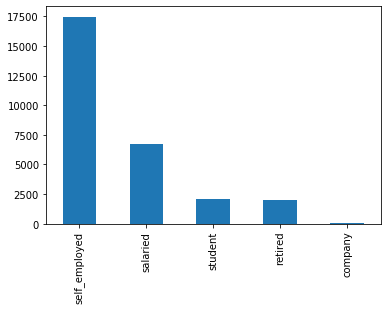

In [22]:
data['occupation'].value_counts().plot.bar()

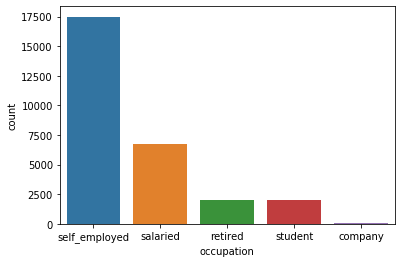

In [23]:
sns.countplot(data['occupation'])

In [24]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [25]:
data['gender'].value_counts()/len(data)*100

Male      58.304559
Female    39.845677
Name: gender, dtype: float64

In [26]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [27]:
dep=data['dependents'].value_counts()
dep

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [28]:
data['dependents'].fillna(value=0.0,inplace=True)

In [29]:
data['dependents'].isnull().sum()

0

In [30]:
data['dependents'].value_counts()

0.0     23898
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [31]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [32]:
data.pivot_table(values='age',index='occupation',aggfunc='median')

,age
occupation,
company,85.5
retired,72.0
salaried,43.0
self_employed,48.0
student,21.0


In [33]:
for i in range(0,len(data)):
    if pd.isnull(data['occupation'][i]):
        if data["age"][i]<25:
            data['occupation'][i]='student'
        elif data['age'][i]>=25 & data['age'][i]<60:
            data['occupation'][i]='salaried'
        else : 
            data['occupation'][i]='retired'

In [34]:
data['occupation'].isnull().sum()

0

In [35]:
data['city'].mode()[0]    # The most common city

1020.0

In [36]:
data['city'].fillna(value= data['city'].mode()[0],inplace=True)
data['days_since_last_transaction'].fillna(value=data['days_since_last_transaction'].mean(),inplace=True)
data['gender'].fillna(value =data['gender'].mode()[0],inplace=True)

In [37]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [38]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [39]:
data= data.astype({'dependents':'int64','city':'int64','customer_nw_category':'object'})

data['dependents'].dtype ,data['city'].dtype ,data['customer_nw_category'].dtype

(dtype('int64'), dtype('int64'), dtype('O'))

In [40]:
data['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [41]:
pd.get_dummies(data['occupation']).head()

,company,retired,salaried,self_employed,student
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [42]:
data=pd.get_dummies(data)
data.head()

,customer_id,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,1,3135,66,0,187,755,224.000000,1458.71,1458.71,1458.71,...,0,1,0,0,0,1,0,0,1,0
1,2,310,35,0,1020,3214,60.000000,5390.37,8704.66,7799.26,...,0,1,0,0,0,1,0,0,1,0
2,4,2356,31,0,146,41,69.997814,3913.16,5815.29,4910.17,...,0,1,0,0,1,0,0,0,1,0
3,5,478,90,0,1020,582,147.000000,2291.91,2291.91,2084.54,...,0,1,0,0,0,1,0,0,1,0
4,6,2531,42,2,1494,388,58.000000,927.72,1401.72,1643.31,...,0,1,0,0,0,1,0,0,0,1


In [43]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          int64
city                                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried                 uint8
occupation_self_employed          

Text(0.5, 1.0, 'average_monthly_balance_prevQ2')

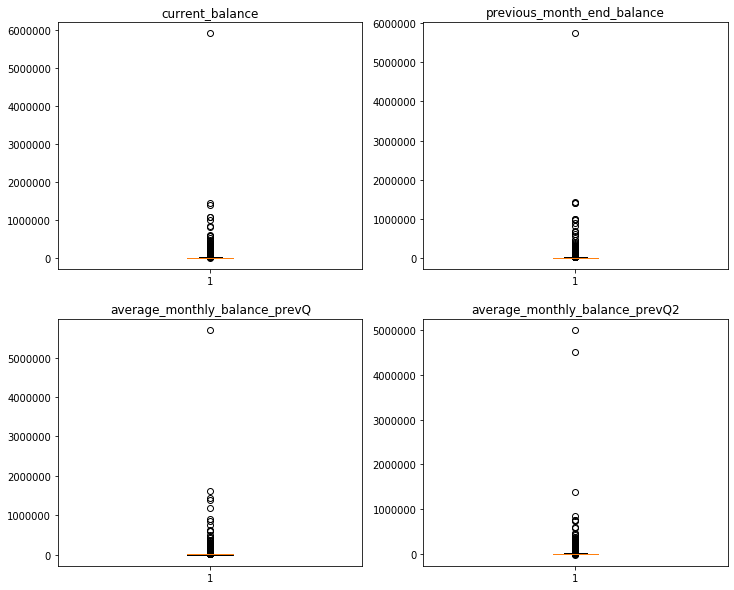

In [44]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(12)

axs[0, 0].boxplot(data['current_balance'])    
axs[0, 0].set_title('current_balance')

axs[0, 1].boxplot(data['previous_month_end_balance'])   
axs[0, 1].set_title('previous_month_end_balance')

axs[1, 0].boxplot(data['average_monthly_balance_prevQ'])    
axs[1, 0].set_title('average_monthly_balance_prevQ')

axs[1, 1].boxplot(data['average_monthly_balance_prevQ2'])    
axs[1, 1].set_title('average_monthly_balance_prevQ2')
  
# Too many outliers present in Transactional details

## Seggregating the Variables

In [45]:
#separating independent and dependent variables

x = data.drop(['churn'], axis=1)
y = data['churn']

__Scaling the data__

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [47]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

__Importing KNN__

In [48]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

__Checking consistency using cross validation__

In [49]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.76937529, 0.76890559, 0.77501174, 0.77454204, 0.78675434,
       0.76890559, 0.77067669, 0.77960526, 0.77819549, 0.77866541])

In [50]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(77.50637455545863, 0.5547978927884697)

### Automating the process of cross validation for different K-Neighbors

In [51]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [52]:
n_neighbors = range(1,10)
mean, std = Val_score(n_neighbors)

### Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

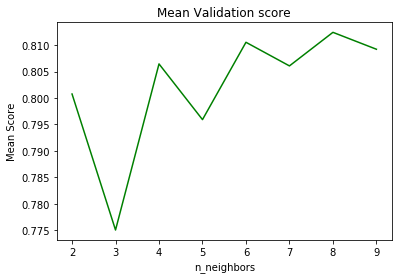

In [53]:
plt.plot(n_neighbors[1:11], mean[1:11], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Ploting Standard Deaviation Validation Score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

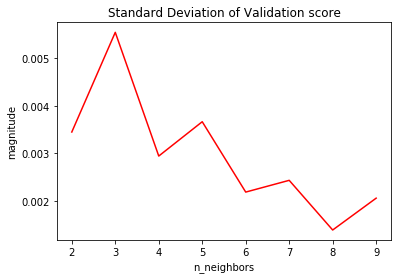

In [69]:
plt.plot(n_neighbors[1:11], std[1:11], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal model over test set

In [72]:
clf = KNN(n_neighbors = 8 )
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.8134160090191658, 0.8201634877384196)